# Final Exam With Netflix Tv Shows And Movies

## 1.  DATA SET :

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in July 2022 containing data available in the United States.

Content:
This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

> - id: The title ID on JustWatch.
> - title: The name of the title.
> - show_type: TV show or movie.
> - description: A brief description.
> - release_year: The release year.
> - age_certification: The age certification.
> - runtime: The length of the episode (SHOW) or movie.
> - genres: A list of genres.
> - production_countries: A list of countries that produced the title.
> - seasons: Number of seasons if it's a SHOW.
> - imdb_id: The title ID on IMDB.
> - imdb_score: Score on IMDB.
> - imdb_votes: Votes on IMDB.
> - tmdb_popularity: Popularity on TMDB.
> - tmdb_score: Score on TMDB.

And over +77k credits of actors and directors on Netflix titles with 5 columns containing their information, including:

> - person_ID: The person ID on JustWatch.
> - id: The title ID on JustWatch.
> - name: The actor or director's name.
> - character_name: The character name.
> - role: ACTOR or DIRECTOR.

## 2. SOURCE OF DATA SET :
https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

## 3. OBJECTIVES :
>In this document i'm gonna analyze data set of all movies and shows on 'Netflix'  and answer this questions :
>
> - Q1: What is the name of 10 Movies and Shows with highest imdb_rating ?
> - Q2: How many movies are produced between 2018 and 2022?
> - Q3: What are the most voted shows or movies in imdb ?
> - Q4: What are 10 top long movies?
> - Q5: What are 5 top long shows (more than one season) ?

## 4. ABOUT MY WORK :
First of all, I will analyze the data set for duplicates, invalid values and etc. Then trying to fix some of them, In the process it's natural to go back and do cleaning our data.

I used pandas, numpy, matplotlib and seaborn for analyzing and visualizing my work, and i learned this job from:
>
> - https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas
> - https://www.freecodecamp.org/learn/data-analysis-with-python/

# 5.OVERALL LOOK:

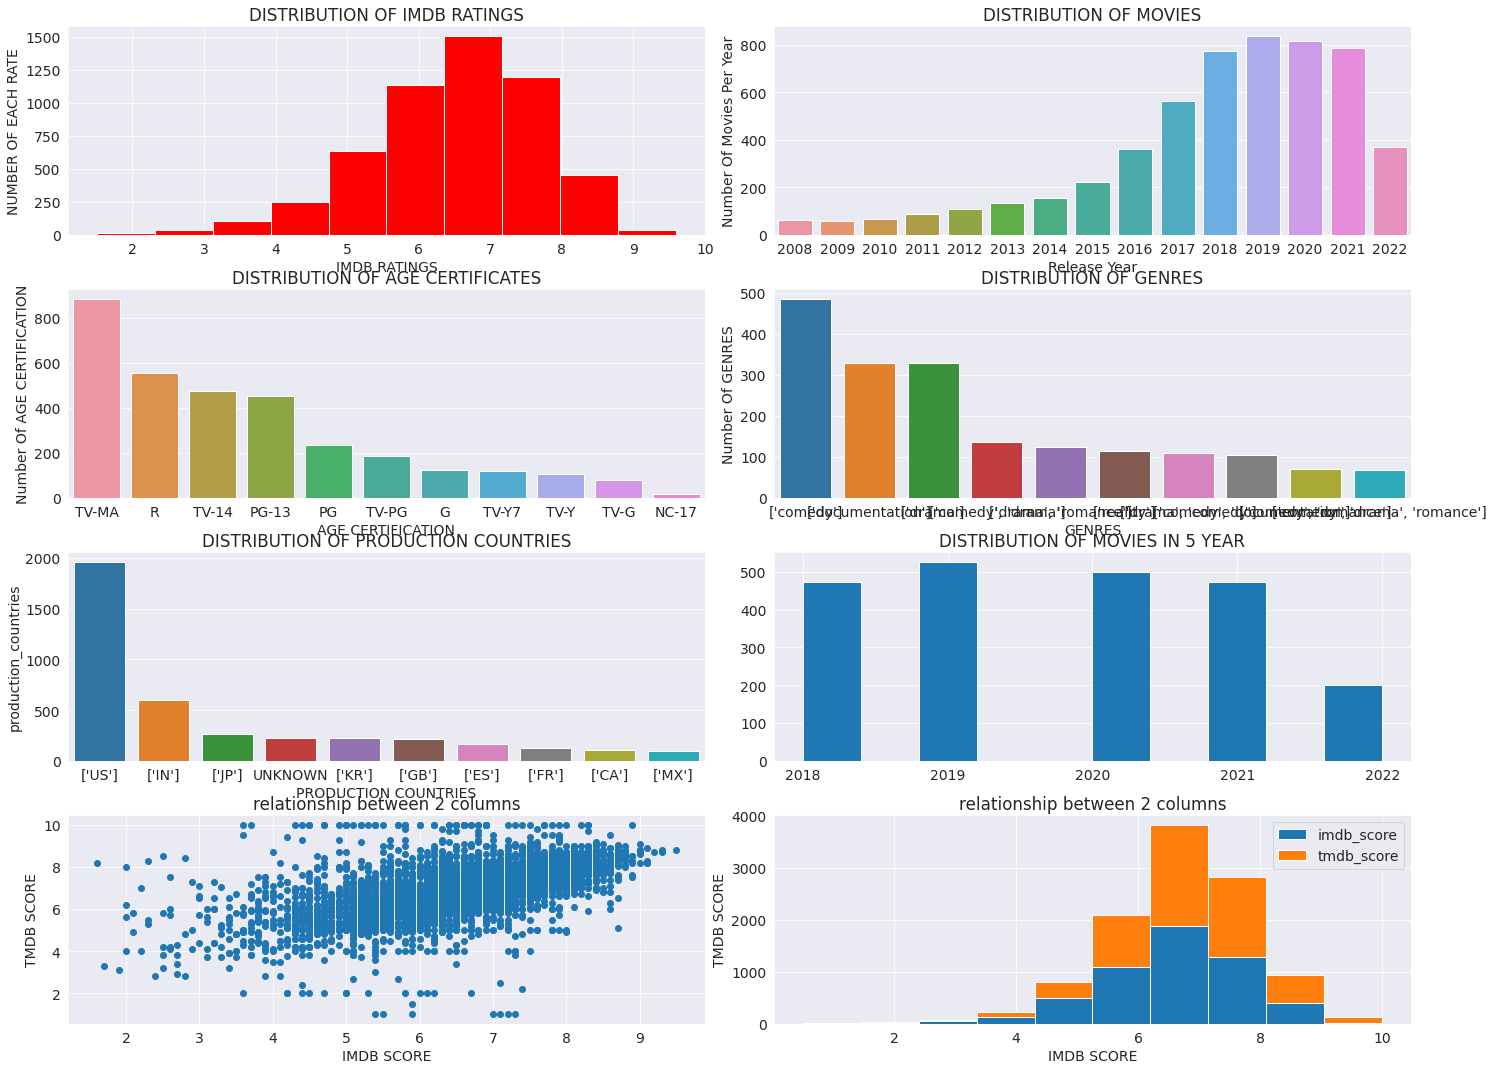

In [139]:
fig, axis= plt.subplots(4,2, figsize=(20,15))
plt.tight_layout(pad=2)

#plotting HISTOGRAM
axis[0,0].set_title('DISTRIBUTION OF IMDB RATINGS')
axis[0,0].set_xlabel('IMDB RATINGS')
axis[0,0].set_ylabel('NUMBER OF EACH RATE')
axis[0,0].hist(NETFLIX_DF.imdb_score, bins=10, color='red', histtype='bar');


#plotting barplot for Number Of Movies Per Year
axis[0,1].set_title('DISTRIBUTION OF MOVIES')
axis[0,1].set_xlabel('Release Year')
axis[0,1].set_ylabel('Number Of Movies Per Year')
sns.barplot(x= RELEASE_YEAR.index, y= RELEASE_YEAR.values, ax=axis[0,1]);


#plotting barplot for Number Of AGE CERTIFICATION
axis[1,0].set_title('DISTRIBUTION OF AGE CERTIFICATES')
axis[1,0].set_xlabel('AGE CERTIFICATION')
axis[1,0].set_ylabel('Number Of AGE CERTIFICATION')
sns.barplot(x= AGE_CERTIFICATION.index, y= AGE_CERTIFICATION.values, ax=axis[1,0]);

#plotting barplot for Number Of GENRES
axis[1,1].set_title('DISTRIBUTION OF GENRES')
axis[1,1].set_xlabel('GENRES')
axis[1,1].set_ylabel('Number Of GENRES')
sns.barplot(x= GENRE.index, y= GENRE.values, ax=axis[1,1]);


#plotting HISTOGRAM for Number Of Movies IN 5 YEAR
axis[2,1].set_title('DISTRIBUTION OF MOVIES IN 5 YEAR')
axis[2,1].set_xticks(ticks=[2018,2019,2020,2021,2022])
axis[2,1].hist(FIVE_YEAR.release_year);

#plotting barplot for Number Of Movies Per Year
axis[2,0].set_title('DISTRIBUTION OF PRODUCTION COUNTRIES')
axis[2,0].set_xlabel('PRODUCTION COUNTRIES')
axis[2,0].set_ylabel('Number Of PRODUCTION COUNTRIES')
sns.barplot(x= COUNTRIES.index, y= COUNTRIES, ax=axis[2,0]);


#plotting barplot for relationship between 2 columns
axis[3,0].set_title('relationship between 2 columns')
axis[3,0].set_xlabel('IMDB SCORE')
axis[3,0].set_ylabel('TMDB SCORE')
axis[3,0].scatter(x= RELATIONSHIP_imdb_tmdb.imdb_score, y=RELATIONSHIP_imdb_tmdb.tmdb_score);

#plotting HISTOGRAM for relationship between 2 columns
axis[3,1].set_title('relationship between 2 columns')
axis[3,1].set_xlabel('IMDB SCORE')
axis[3,1].set_ylabel('TMDB SCORE')
axis[3,1].hist([RELATIONSHIP_imdb_tmdb.imdb_score,RELATIONSHIP_imdb_tmdb.tmdb_score], stacked=True)
plt.legend(['imdb_score', 'tmdb_score']);

# FIRST STEP :

## Downloading the Dataset

First of all we should access to our data set, so we will download it from link described in section SOURCE OF DATA SET. 
For downloading, we will use :
>
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

The data is in csv format:

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./netflix-tv-shows-and-movies" (use force=True to force download)


Now The dataset has been downloaded and extracted.

In [4]:
data_dir = './netflix-tv-shows-and-movies'

In [5]:
import os
os.listdir(data_dir)

['credits.csv', 'titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "final-exam-with-netflix-tv-shows-and-movies"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farimahjabbari/final-exam-with-netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies


'https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies'

# SECOND STEP :

## Data Preparation and Cleaning

Before we do any calculation, manipulation and the analyze the data set we should look into our data and make sure there are no invalid values, duplicates and wrong data types and for this we have to cleaning it over and over, even we will back to this step in middle of our work because in huge data sets we can't find every thing in this step when we go further we can have insights and find out where need to be cleaned and prepared again.

In [10]:
import pandas as pd
import numpy as np

In [13]:
NETFLIX_DF= pd.read_csv('netflix-tv-shows-and-movies/titles.csv')
NETFLIX_DF.headd(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [12]:
NETFLIX_DF.shape

(5850, 15)

In [14]:
NETFLIX_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [15]:
NETFLIX_DF.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [16]:
NETFLIX_DF.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [17]:
NETFLIX_DF.type.value_counts()

MOVIE    3744
SHOW     2106
Name: type, dtype: int64

In [18]:
NETFLIX_DF['production_countries'].value_counts().head(20)

['US']    1959
['IN']     599
['JP']     264
[]         229
['KR']     222
['GB']     218
['ES']     161
['FR']     125
['CA']     107
['MX']      98
['BR']      90
['TR']      83
['PH']      80
['DE']      68
['NG']      64
['AU']      62
['ID']      61
['CN']      59
['TW']      59
['IT']      56
Name: production_countries, dtype: int64

In [19]:
NETFLIX_DF['production_countries'].unique()

array(["['US']", "['GB']", "['GB', 'US']", "['EG']", "['DE']", "['IN']",
       "['SU', 'IN']", "['LB', 'CA', 'FR']", '[]', "['LB']",
       "['DZ', 'EG']", "['CA', 'FR', 'LB']", "['US', 'GB']",
       "['US', 'IT']", "['JP']", "['AR']", "['FR', 'EG']", "['FR', 'LB']",
       "['CA', 'US']", "['US', 'FR']", "['JP', 'US']", "['US', 'CA']",
       "['DE', 'US']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['IE', 'GB', 'DE', 'FR']", "['HK', 'US']", "['AU']", "['FR']",
       "['DE', 'GH', 'GB', 'US', 'BF']", "['MX']", "['ES', 'AR']",
       "['CO']", "['PS', 'US', 'FR', 'DE']", "['FR', 'NO', 'LB', 'BE']",
       "['BE', 'FR', 'IT', 'LB']", "['TR']", "['IN', 'SU']", "['DK']",
       "['CA']", "['DE', 'GB', 'US', 'BS', 'CZ']", "['MT', 'GB', 'US']",
       "['AU', 'DE', 'GB', 'US']", "['US', 'JP']", "['BE', 'US']",
       "['HK']", "['IT']", "['US', 'FR', 'DE', 'GB']",
       "['GB', 'US', 'FR', 'DE']", "['IT', 'US']", "['US', 'ZA']",
       "['GB', 'ES']", "['GB', 'US', 'JP']", "['

# CLEANING INVALID DATA:

Because we have '[]' in the production_countries column we have to fix it so we will replace it with 'UNKNOWN' entire column.

In [20]:
NETFLIX_DF.loc[NETFLIX_DF.production_countries=='[]', 'production_countries']= NETFLIX_DF.loc[NETFLIX_DF.production_countries== '[]' , 'production_countries'].replace({'[]':'UNKNOWN'})
NETFLIX_DF

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],UNKNOWN,NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [21]:
NETFLIX_DF.production_countries.value_counts().head(20)

['US']     1959
['IN']      599
['JP']      264
UNKNOWN     229
['KR']      222
['GB']      218
['ES']      161
['FR']      125
['CA']      107
['MX']       98
['BR']       90
['TR']       83
['PH']       80
['DE']       68
['NG']       64
['AU']       62
['ID']       61
['CN']       59
['TW']       59
['IT']       56
Name: production_countries, dtype: int64

Now we need to seperate production_countries and genres for counting:

In [23]:
def split_multicolumn(col_series):
    result_df= col_series.to_frame()
    options=[]
    for idx, value in col_series[col_series.notnull()].iteritems():
        for option in value.split('[]'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option]= False
            result_df.at[idx, option]= True
    return result_df[options]

COUNTRIES_TOTAL_DF= split_multicolumn(NETFLIX_DF.production_countries)
COUNTRIES_TOTAL_DF

/tmp/ipykernel_93/3887848607.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[option]= False


,['US'],['GB'],"['GB', 'US']",['EG'],['DE'],['IN'],"['SU', 'IN']","['LB', 'CA', 'FR']",UNKNOWN,['LB'],...,['AF'],"['BE', 'LU']","['BE', 'DE']","['SE', 'RO']","['ZA', 'US']","['GB', 'IN']","['HU', 'CA']","['NG', 'CA']","['TZ', 'GB']","['PH', 'FO']"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5846,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5847,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5848,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
NETFLIX_DF['genres'].value_counts().head(50)

['comedy']                           484
['documentation']                    329
['drama']                            328
['comedy', 'drama']                  135
['drama', 'romance']                 124
['reality']                          113
['drama', 'comedy']                  109
['comedy', 'documentation']          104
['comedy', 'romance']                 69
['comedy', 'drama', 'romance']        67
['animation']                         62
[]                                    59
['documentation', 'crime']            55
['romance', 'comedy']                 50
['drama', 'crime']                    45
['documentation', 'music']            45
['thriller', 'drama']                 44
['romance', 'drama']                  43
['drama', 'thriller']                 41
['drama', 'comedy', 'romance']        41
['drama', 'european']                 40
['documentation', 'sport']            36
['romance', 'comedy', 'drama']        34
['drama', 'thriller', 'crime']        33
['comedy', 'euro

In [25]:
NETFLIX_DF.loc[NETFLIX_DF.genres=='[]', 'genres']= NETFLIX_DF.loc[NETFLIX_DF.genres== '[]' , 'genres'].replace({'[]':'UNKNOWN'})
NETFLIX_DF

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],UNKNOWN,NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,UNKNOWN,['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [26]:
def split_multicolumn(col_series):
    result_df= col_series.to_frame()
    options=[]
    for idx, value in col_series[col_series.notnull()].iteritems():
        for option in value.split('[]'):
            if not option in result_df.columns:
                options.append(option)
                result_df[option]= False
            result_df.at[idx, option]= True
    return result_df[options]

GENRES_TOTAL_DF= split_multicolumn(NETFLIX_DF.genres)
GENRES_TOTAL_DF

/tmp/ipykernel_93/1210361092.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[option]= False


,['documentation'],"['drama', 'crime']","['drama', 'action', 'thriller', 'european']","['fantasy', 'action', 'comedy']","['war', 'action']","['comedy', 'european']",['comedy'],"['thriller', 'action', 'crime']","['crime', 'drama', 'action']","['romance', 'action', 'drama']",...,"['reality', 'family']","['drama', 'horror', 'music', 'thriller', 'crime']","['animation', 'fantasy', 'family', 'comedy']","['action', 'thriller', 'crime', 'sport']","['action', 'crime', 'comedy']","['drama', 'romance', 'thriller', 'horror']","['animation', 'comedy', 'fantasy', 'action']","['drama', 'animation', 'music']","['animation', 'family', 'scifi']","['documentation', 'music', 'reality']"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5846,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5847,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5848,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# COUNTING NaNs:

In [28]:
NETFLIX_DF.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

# FINDING DUPLICATES:

In [31]:
NETFLIX_DF.duplicated().value_counts()

False    5850
dtype: int64

# TOP FIVEs:

In [33]:
NETFLIX_DF.imdb_score.value_counts(ascending=False).head(5)

6.5    206
7.1    200
7.4    197
6.7    196
6.8    191
Name: imdb_score, dtype: int64

In [34]:
NETFLIX_DF.tmdb_popularity.value_counts(ascending=False).head(5)

0.600    58
1.400    51
1.960    10
0.840     9
3.231     5
Name: tmdb_popularity, dtype: int64

In [35]:
NETFLIX_DF.tmdb_score.value_counts(ascending=False).head(5)

7.0    272
6.8    213
6.5    198
7.2    198
7.3    193
Name: tmdb_score, dtype: int64

# THIRD STEP:

## Exploratory Analysis and Visualization

After we prepared and cleaned the data set, Now we have some insights of the data set and we will go for next step, in this step we will try to find relation ship between columns and plot them and describe their results.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [36]:
!pip install matplotlib seaborn --upgrade --quiet
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [38]:
NETFLIX_DF.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


Explore one or more columns by plotting a graph below, and add some explanation about it

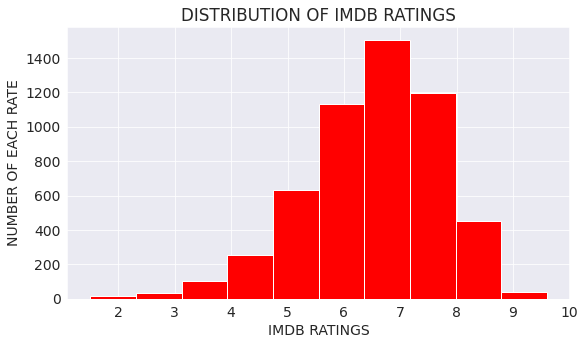

In [39]:
plt.title('DISTRIBUTION OF IMDB RATINGS')
plt.xlabel('IMDB RATINGS')
plt.ylabel('NUMBER OF EACH RATE')
plt.hist(NETFLIX_DF.imdb_score, bins=10, color='red', histtype='bar');

We can see most of the shows and movies have ratings in range 6 to 8, though it seems we have an noticeable number for range 4.6 to 5.6 and this means we need good movies and shows more and more. 

Explore one or more columns by plotting a graph below, and add some explanation about it

In [50]:
RELEASE_YEAR= NETFLIX_DF['release_year'].value_counts().head(15)
RELEASE_YEAR

2019    836
2020    814
2021    787
2018    773
2017    563
2022    371
2016    362
2015    223
2014    153
2013    135
2012    107
2011     86
2010     66
2008     63
2009     59
Name: release_year, dtype: int64

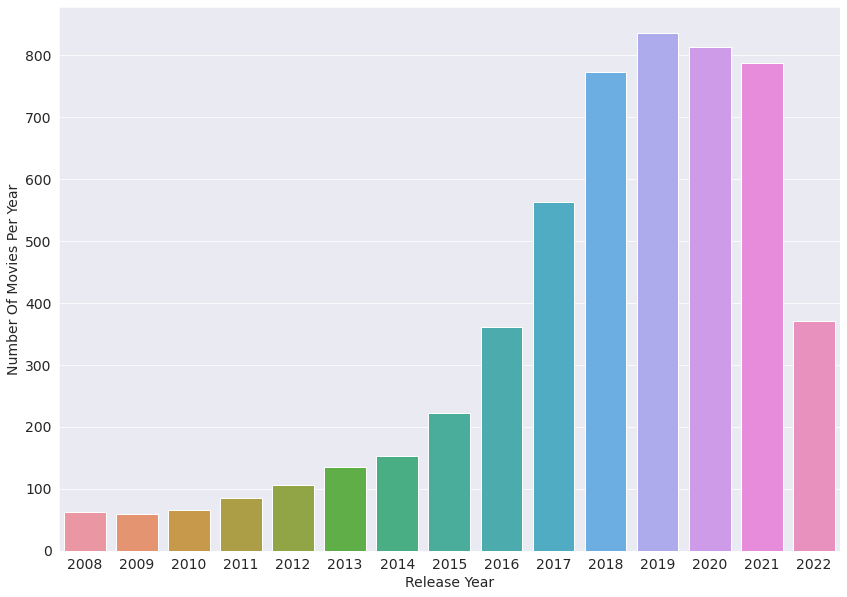

In [49]:
plt.figure(figsize=(14,10))
plt.xlabel('Release Year')
plt.ylabel('Number Of Movies Per Year')
sns.barplot(x= RELEASE_YEAR.index, y= RELEASE_YEAR.values);

Through the time, we have more movies and shows. because of:
>
> - Technologies are helping cinema industry and film companies to producing more technical products.
>- People have more interest and attention to movies and shows for entertainment and learning more than ever.

Explore one or more columns by plotting a graph below, and add some explanation about it

In [51]:
AGE_CERTIFICATION= NETFLIX_DF['age_certification'].value_counts().head(15)
AGE_CERTIFICATION

TV-MA    883
R        556
TV-14    474
PG-13    451
PG       233
TV-PG    188
G        124
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: age_certification, dtype: int64

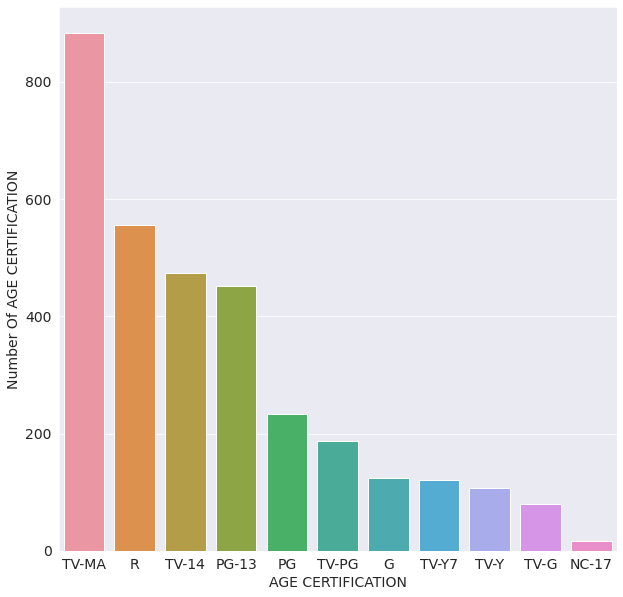

In [52]:
plt.figure(figsize=(10,10))
plt.xlabel('AGE CERTIFICATION')
plt.ylabel('Number Of AGE CERTIFICATION')
sns.barplot(x= AGE_CERTIFICATION.index, y= AGE_CERTIFICATION.values);

most of the shows are in TV-MA age certificate so most of the shows made for adults and an interesting point is the second place if for R group.

Explore one or more columns by plotting a graph below, and add some explanation about it

In [58]:
GENRE= NETFLIX_DF['genres'].value_counts().head(10)
GENRE

['comedy']                        484
['documentation']                 329
['drama']                         328
['comedy', 'drama']               135
['drama', 'romance']              124
['reality']                       113
['drama', 'comedy']               109
['comedy', 'documentation']       104
['comedy', 'romance']              69
['comedy', 'drama', 'romance']     67
Name: genres, dtype: int64

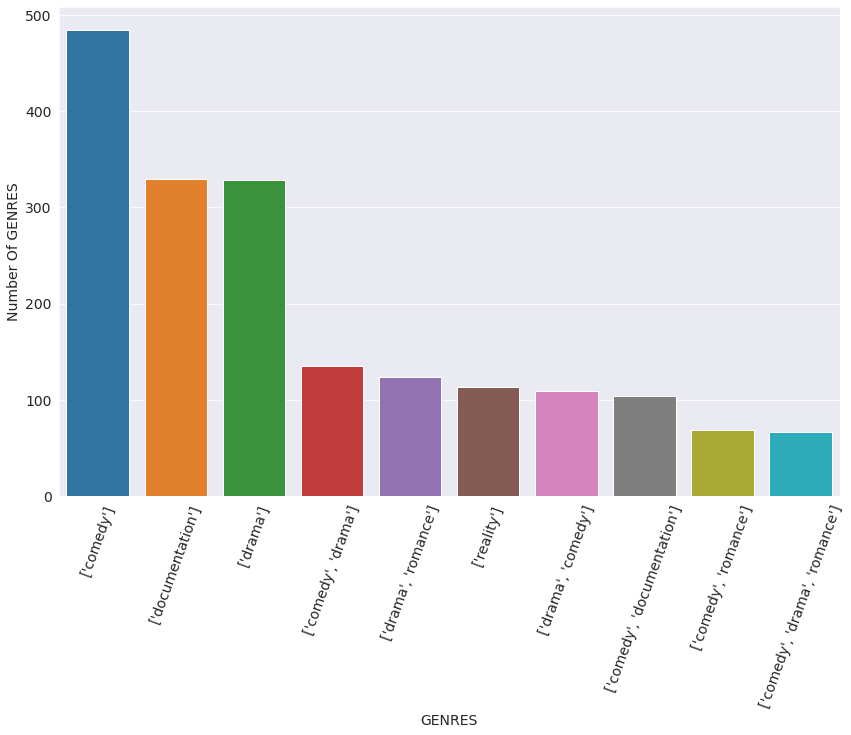

In [61]:
plt.figure(figsize=(14,9))
plt.xticks(rotation=70)
plt.xlabel('GENRES')
plt.ylabel('Number Of GENRES')
sns.barplot(x= GENRE.index, y= GENRE.values);

Most of the shows are in comedy genre so every body can watch shows, maybe because:
>
> - It's easier to make comedies.
> - Comedies have more fans from the other genres.
> - Comedies can be the way for teaching and make some points for society problems.

Explore one or more columns by plotting a graph below, and add some explanation about it

In [63]:
COUNTRIES= NETFLIX_DF['production_countries'].value_counts().head(10)
COUNTRIES

['US']     1959
['IN']      599
['JP']      264
UNKNOWN     229
['KR']      222
['GB']      218
['ES']      161
['FR']      125
['CA']      107
['MX']       98
Name: production_countries, dtype: int64

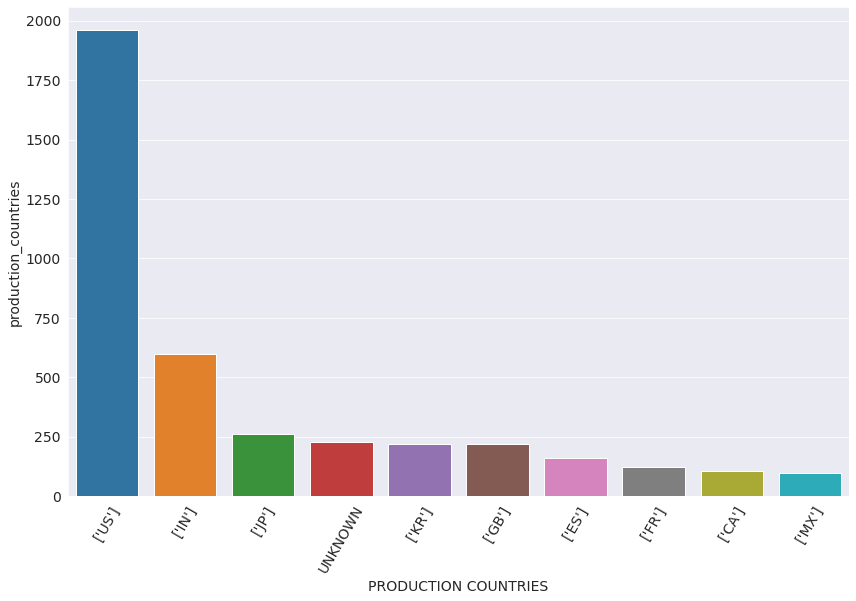

In [65]:
plt.figure(figsize=(14,9))
plt.xticks(rotation=60)
plt.xlabel('PRODUCTION COUNTRIES')
plt.ylabel('Number Of PRODUCTION COUNTRIES')
sns.barplot(x= COUNTRIES.index, y= COUNTRIES);

USA has the most of production of the shows and movies, so:
>
> - They can earn so much money.
> - They can influence on so many people in any ages.

Let us save and upload our work to Jovian before continuing

In [66]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farimahjabbari/final-exam-with-netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies


'https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies'

In [68]:
import jovian

In [69]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farimahjabbari/final-exam-with-netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies


'https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies'

## Asking and Answering Questions

>Now we will ask questions and trying to answer them and plot them: 
>
> - Q1: What is the name of 10 Movies and Shows with highest imdb_rating ?
> - Q2: How many movies are produced between 2018 and 2022?
> - Q3: What are the most voted shows or movies in imdb ?
> - Q4: What are 10 top long movies?
> - Q5: What are 5 top long shows (more than one season) ?

In [70]:
NETFLIX_DF

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],UNKNOWN,NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,UNKNOWN,['US'],NaN,NaN,NaN,NaN,1.296,10.000


### Q1: What is the name of 10 Movies and Shows with highest imdb_rating ?

In [71]:
HIGH_RATINGS= NETFLIX_DF[['title', 'type', 'imdb_score']].sort_values('imdb_score', ascending=False)
HIGH_RATINGS.head(10)

,title,type,imdb_score
2658,#ABtalks,SHOW,9.6
216,Breaking Bad,SHOW,9.5
564,Khawatir,SHOW,9.5
3147,Our Planet,SHOW,9.3
233,Avatar: The Last Airbender,SHOW,9.3
1258,Reply 1988,SHOW,9.2
3068,The Last Dance,SHOW,9.1
1092,Chhota Bheem & Krishna vs Zimbara,MOVIE,9.1
4771,Major,MOVIE,9.1
3500,Kota Factory,SHOW,9.1


In [72]:
RATINGS= HIGH_RATINGS.head(10)
RATINGS

,title,type,imdb_score
2658,#ABtalks,SHOW,9.6
216,Breaking Bad,SHOW,9.5
564,Khawatir,SHOW,9.5
3147,Our Planet,SHOW,9.3
233,Avatar: The Last Airbender,SHOW,9.3
1258,Reply 1988,SHOW,9.2
3068,The Last Dance,SHOW,9.1
1092,Chhota Bheem & Krishna vs Zimbara,MOVIE,9.1
4771,Major,MOVIE,9.1
3500,Kota Factory,SHOW,9.1


### Q2: how many movies are produced between 2018 and 2022 ?

In [73]:
FIVE_YEAR_MOVIES= NETFLIX_DF[['title','type', 'release_year', 'production_countries']]
FIVE_YEAR_MOVIES

,title,type,release_year,production_countries
0,Five Came Back: The Reference Films,SHOW,1945,['US']
1,Taxi Driver,MOVIE,1976,['US']
2,Deliverance,MOVIE,1972,['US']
3,Monty Python and the Holy Grail,MOVIE,1975,['GB']
4,The Dirty Dozen,MOVIE,1967,"['GB', 'US']"
...,...,...,...,...
5845,Fine Wine,MOVIE,2021,['NG']
5846,C/O Kaadhal,MOVIE,2021,UNKNOWN
5847,Lokillo,MOVIE,2021,['CO']
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,['US']


In [74]:
FIVE_YEAR= FIVE_YEAR_MOVIES.loc[(FIVE_YEAR_MOVIES['type']== 'MOVIE')]
FIVE_YEAR= FIVE_YEAR.loc[FIVE_YEAR['release_year'].isin([2018,2019,2020,2021,2022])]
FIVE_YEAR.shape[0]

2171

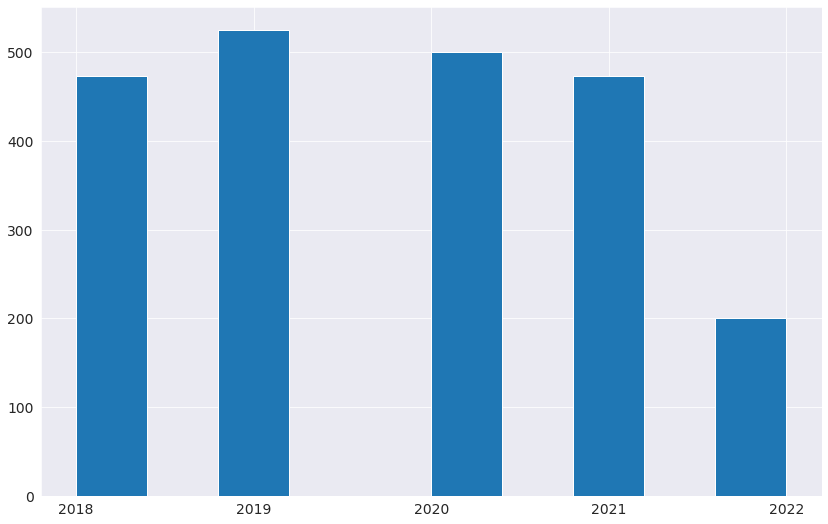

In [75]:
plt.figure(figsize=(14,9))
plt.xticks(ticks=[2018,2019,2020,2021,2022])
plt.hist(FIVE_YEAR.release_year);

### Q3: what are the most voted shows or movies in imdb ?

In [76]:
MOST_VOTED= NETFLIX_DF.drop(['id', 'imdb_id', 'tmdb_popularity', 'tmdb_score'], axis= 'columns',)
MOST_VOTED

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,8.2,808582.0
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,7.7,107673.0
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,8.2,534486.0
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,7.7,72662.0
...,...,...,...,...,...,...,...,...,...,...,...
5845,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,6.8,45.0
5846,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],UNKNOWN,NaN,7.7,348.0
5847,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,3.8,68.0
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,UNKNOWN,['US'],NaN,NaN,NaN


In [77]:
MOST_VOTED_imdb= MOST_VOTED.sort_values('imdb_votes', ascending=False)
MOST_VOTED_imdb.head(10)

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
237,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,"['action', 'scifi', 'music', 'thriller']","['US', 'GB']",NaN,8.8,2294231.0
97,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,"['drama', 'romance']",['US'],NaN,8.8,2021343.0
216,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"['drama', 'crime', 'thriller']",['US'],5.0,9.5,1775990.0
645,The Dark Knight Rises,MOVIE,Following the death of District Attorney Harve...,2012,PG-13,165,"['thriller', 'action', 'drama', 'crime']",['US'],NaN,8.4,1669067.0
94,Se7en,MOVIE,Two homicide detectives are on a desperate hun...,1995,R,127,"['crime', 'thriller', 'drama']",['US'],NaN,8.6,1606270.0
651,Django Unchained,MOVIE,"With the help of a German bounty hunter, a fre...",2012,R,165,"['western', 'drama']",['US'],NaN,8.4,1472668.0
239,The Departed,MOVIE,"To take down South Boston's Irish Mafia, the p...",2006,R,151,"['drama', 'thriller', 'crime', 'action']",['US'],NaN,8.5,1296244.0
102,Titanic,MOVIE,101-year-old Rose DeWitt Bukater tells the sto...,1997,PG-13,194,"['drama', 'romance']",['US'],NaN,7.9,1146825.0
109,Léon: The Professional,MOVIE,"Léon, the top hit man in New York, has earned ...",1994,R,111,"['crime', 'drama', 'action', 'thriller', 'euro...","['US', 'FR']",NaN,8.5,1137357.0
36,GoodFellas,MOVIE,"The true story of Henry Hill, a half-Irish, ha...",1990,R,145,"['drama', 'crime']",['US'],NaN,8.7,1131681.0


### Q4: what are 10 top long movies?

In [78]:
LONG= NETFLIX_DF[['title', 'type', 'runtime']]
LONG= LONG.loc[LONG.type== 'MOVIE']
LONG

,title,type,runtime
1,Taxi Driver,MOVIE,114
2,Deliverance,MOVIE,109
3,Monty Python and the Holy Grail,MOVIE,91
4,The Dirty Dozen,MOVIE,150
6,Life of Brian,MOVIE,94
...,...,...,...
5844,Bling Empire - The Afterparty,MOVIE,35
5845,Fine Wine,MOVIE,100
5846,C/O Kaadhal,MOVIE,134
5847,Lokillo,MOVIE,90


In [79]:
LONG_MOVIES= LONG.sort_values('runtime', ascending=False)
LONG_MOVIES.head(10)

,title,type,runtime
923,Bonnie & Clyde,MOVIE,240
438,A Lion in the House,MOVIE,225
347,Lagaan: Once Upon a Time in India,MOVIE,224
412,Jodhaa Akbar,MOVIE,214
406,Kabhi Khushi Kabhie Gham,MOVIE,210
3076,The Irishman,MOVIE,209
351,No Direction Home: Bob Dylan,MOVIE,208
166,Hum Aapke Hain Koun..!,MOVIE,206
2495,Jab Harry Met Sejal,MOVIE,200
265,Apocalypse Now Redux,MOVIE,196


### Q5: What are 5 top long shows (more than one season) ?

In [80]:
LONG= NETFLIX_DF[['title', 'type', 'seasons']]
LONG= LONG.loc[LONG.type== 'SHOW']
LONG

,title,type,seasons
0,Five Came Back: The Reference Films,SHOW,1.0
5,Monty Python's Flying Circus,SHOW,4.0
26,Monty Python's Fliegender Zirkus,SHOW,1.0
35,Seinfeld,SHOW,9.0
44,Knight Rider,SHOW,4.0
...,...,...,...
5828,The Family That Sings Together: The Camargos,SHOW,1.0
5830,Let's Eat,SHOW,1.0
5831,Pitta Kathalu,SHOW,1.0
5833,HQ Barbers,SHOW,1.0


In [85]:
LONG_SHOWS= LONG.sort_values('seasons', ascending=False)
LONG_SHOWS= LONG_SHOWS.head(10)
LONG_SHOWS

,title,type,seasons
91,Survivor,SHOW,42.0
48,Wheel of Fortune,SHOW,39.0
101,The Challenge,SHOW,37.0
217,Top Gear,SHOW,32.0
114,Power Rangers,SHOW,29.0
95,Pokémon,SHOW,25.0
261,America's Next Top Model,SHOW,24.0
45,Thomas & Friends,SHOW,24.0
100,One Piece,SHOW,21.0
232,NCIS,SHOW,20.0


# Q6: Is there any relationship between imdb_score and tmdb_score ?

In [87]:
RELATIONSHIP_imdb_tmdb= NETFLIX_DF[['title','type','imdb_score','tmdb_score']]
RELATIONSHIP_imdb_tmdb

,title,type,imdb_score,tmdb_score
0,Five Came Back: The Reference Films,SHOW,NaN,NaN
1,Taxi Driver,MOVIE,8.2,8.179
2,Deliverance,MOVIE,7.7,7.300
3,Monty Python and the Holy Grail,MOVIE,8.2,7.811
4,The Dirty Dozen,MOVIE,7.7,7.600
...,...,...,...,...
5845,Fine Wine,MOVIE,6.8,NaN
5846,C/O Kaadhal,MOVIE,7.7,NaN
5847,Lokillo,MOVIE,3.8,6.300
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,NaN,10.000


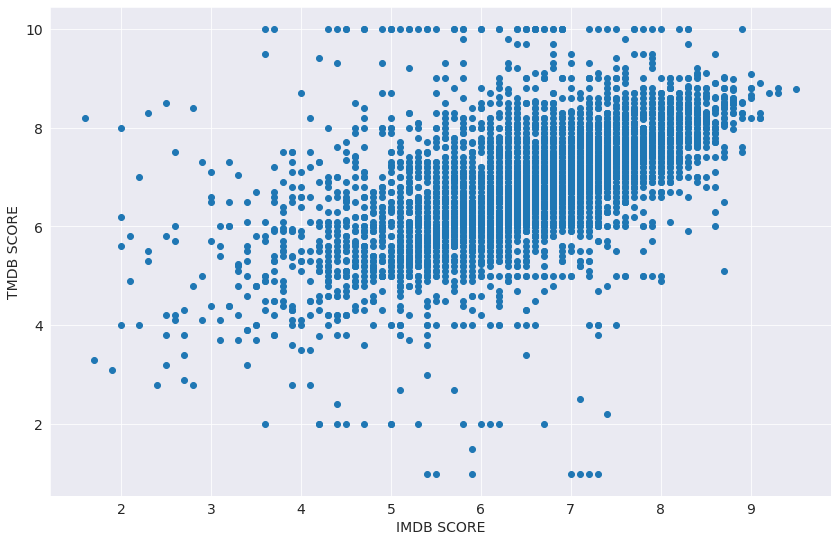

In [97]:
plt.figure(figsize=(14,9))
plt.xlabel('IMDB SCORE')
plt.ylabel('TMDB SCORE')
plt.scatter(x= RELATIONSHIP_imdb_tmdb.imdb_score, y=RELATIONSHIP_imdb_tmdb.tmdb_score);

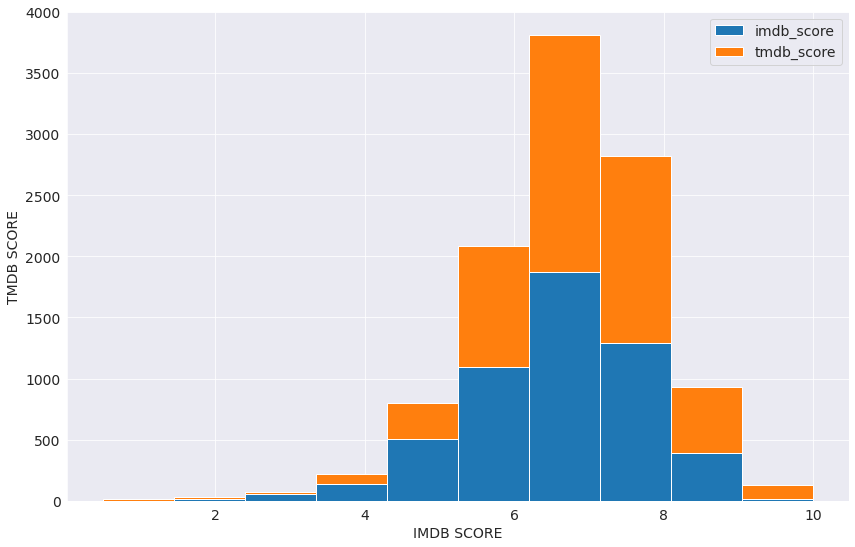

In [106]:
plt.figure(figsize=(14,9))
plt.xlabel('IMDB SCORE')
plt.ylabel('TMDB SCORE')
plt.hist([RELATIONSHIP_imdb_tmdb.imdb_score,RELATIONSHIP_imdb_tmdb.tmdb_score], stacked=True)
plt.legend(['imdb_score', 'tmdb_score']);

Let us save and upload our work to Jovian before continuing.

In [112]:
import jovian

In [113]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farimahjabbari/final-exam-with-netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies


'https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies'

## Inferences and Conclusion

from this analysis we found out that from 1945 to july 2022, we have more shows and movies and most of this data set made from shows, we found out about :

> - The name of 10 Movies and Shows with highest imdb_rating.
> - Movies that they are produced between 2018 and 2022.
> - Most voted shows or movies in imdb.
> - 10 top long movies.
> - top long shows (more than one season).
> - relationship between imdb_score and tmdb_score.
We learned most of products are in comedy genre and what is the most productive country, and we found out we have products with rating between 6 to 8 and we need more and more good stuff.

In [114]:
import jovian

In [115]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farimahjabbari/final-exam-with-netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies


'https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies'

## References and Future Work

I will more work on this data set (on both parts) and i will trying to make sure this document will be better and updated, this is my first official work and i learned so much, thanks to 'jovian' and 'free code camp' !!
>
>
> - references:
> - https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas
> -https://www.freecodecamp.org/learn/data-analysis-with-python/

In [142]:
import jovian

In [143]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "farimahjabbari/final-exam-with-netflix-tv-shows-and-movies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies


'https://jovian.ai/farimahjabbari/final-exam-with-netflix-tv-shows-and-movies'